Project guide: https://www.dataquest.io/m/201/guided-project%3A-star-wars-survey

Solution by DataQuest: https://github.com/dataquestio/solutions/blob/master/Mission201Solution.ipynb

<br /><br />

The dataset, downloaded from https://github.com/fivethirtyeight/data/tree/master/star-wars-survey, contains responses on Star Wars movies.

# Read in data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
# read in data
star_wars = pd.read_csv("StarWars.csv", encoding="ISO-8859-1")

# ensure all rows and columns in data can be displayed
pd.set_option("display.max_columns", len(star_wars.columns))
pd.set_option("display.max_rows", star_wars.shape[0])

# display numbers of columns and rows in dataset
star_wars_dim = star_wars.shape
print("Number of rows: " + str(star_wars_dim[0]))
print("Number of columns: " + str(star_wars_dim[1]))
print()

# display column names
star_wars.columns.tolist()

Number of rows: 1187
Number of columns: 38



['RespondentID',
 'Have you seen any of the 6 films in the Star Wars franchise?',
 'Do you consider yourself to be a fan of the Star Wars film franchise?',
 'Which of the following Star Wars films have you seen? Please select all that apply.',
 'Unnamed: 4',
 'Unnamed: 5',
 'Unnamed: 6',
 'Unnamed: 7',
 'Unnamed: 8',
 'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
 'Unnamed: 10',
 'Unnamed: 11',
 'Unnamed: 12',
 'Unnamed: 13',
 'Unnamed: 14',
 'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
 'Unnamed: 16',
 'Unnamed: 17',
 'Unnamed: 18',
 'Unnamed: 19',
 'Unnamed: 20',
 'Unnamed: 21',
 'Unnamed: 22',
 'Unnamed: 23',
 'Unnamed: 24',
 'Unnamed: 25',
 'Unnamed: 26',
 'Unnamed: 27',
 'Unnamed: 28',
 'Which character shot first?',
 'Are you familiar with the Expanded Universe?',
 'Do you consider yourself to be a fan of the Expan

Some columns are "Unnamed". Let's inspect the first 10 rows to check these and for any abnormalities.

<a name="firstfive"></a>

In [2]:
# display first 5 columns
display(star_wars.iloc[:5])

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


The "Unnamed" columns first row were part of column labels. That is, the dataset begins from second row of the data.

The dataset looks OK otherwise although Nan value appears here and there.

Let's check the next 5 rows just to be sure.

In [3]:
# display next 5 columns
display(star_wars.iloc[5:10])

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,4,6,2,1,3,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,4,3,6,5,2,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Neither favorably nor unfavorably (neutral),Very favorably,Neither favorably nor unfavorably (neutral),Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,5,4,3,1,2,Very favorably,Very favorably,Somewhat favorably,Somewhat favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat unfavorably,Somewhat favorably,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,5,6,3,2,1,Very favorably,Somewhat favorably,Very favorably,Neither favorably nor unfavorably (neutral),Very favorably,Very unfavorably,Somewhat unfavorably,Neither favorably nor unfavorably (neutral),Somewhat favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat unfavorably,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,4,6,2,1,3,Very favorably,Somewhat unfavorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Very favorably,Very favorably,Very favorably,Very fav

<a name="valuecount"></a>

It still looks OK.

Are there any abnormal values in the rest of the dataset? To check this, each columns unique values will be counted and displayed.

In [4]:
# display unique values for each column
for column in star_wars.drop("RespondentID", axis=1):
    # note: responses start from row 1
    print(star_wars[column].iloc[1:].value_counts())
    print("\n")

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64


Yes    552
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


Star Wars: Episode I  The Phantom Menace    673
Name: Which of the following Star Wars films have you seen? Please select all that apply., dtype: int64


Star Wars: Episode II  Attack of the Clones    571
Name: Unnamed: 4, dtype: int64


Star Wars: Episode III  Revenge of the Sith    550
Name: Unnamed: 5, dtype: int64


Star Wars: Episode IV  A New Hope    607
Name: Unnamed: 6, dtype: int64


Star Wars: Episode V The Empire Strikes Back    758
Name: Unnamed: 7, dtype: int64


Star Wars: Episode VI Return of the Jedi    738
Name: Unnamed: 8, dtype: int64


4    237
6    168
3    130
1    129
5    100
2     71
Name: Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film., dtype: int64


5

It looks OK here, too.

# Data cleaning

## Remove respondents without IDs

This will remove the [first row](#firstfive), where respondent ID is missing. But, this row contains movie titles which will be useful later. So, they will be saved first.

In [5]:
# save movie titles
titles = [i for i in star_wars.iloc[0, 3:9]]

# save character names
chars = [i for i in star_wars.iloc[0, 15:29]]

Now, the row will null respondent gets removed.

In [6]:
id_notnull = pd.notnull(star_wars["RespondentID"])
star_wars = star_wars[id_notnull]
print("Number of rows: " + str(star_wars.shape[0]))

star_wars.head()

Number of rows: 1186


,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,4,6,2,1,3,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## Convert format

### Yes/No to True/False

True/False will be easier to work with than Yes/No.

[Inspection above](#valuecount) shows there are five such columns, which all contain both "Yes" and "No". So, I will convert columns containing "Yes". I will use [`pandas.Series.map`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.map.html).

In [7]:
# identify columns containing "Yes"
yes_cols = []
for col in star_wars:
    try:
        if star_wars[col].str.contains("Yes").sum():
            yes_cols.append(col)
    except:
        pass

# convert the columns (Yes/No --> True/False)
yesno_to_bool = {"Yes": True, "No": False}
for col in yes_cols:
    star_wars[col] = star_wars[col].map(yesno_to_bool)

# display first five rows of these columns
star_wars[yes_cols].head()

,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?
1,True,True,True,False,False
2,False,NaN,NaN,NaN,True
3,True,False,False,NaN,False
4,True,True,False,NaN,True
5,True,True,True,False,False


### Movie titles to True/False

The responses to the columns `Which of the following Star Wars films have you seen? Please select all that apply.` and `Unnamed: 4` - `Unnamed: 8` contain movie titles (seen the movie) or Nan values (not seen the movie).

These will also be converted.

Then, the column names will be changed to `seen_1` - `seen_6` using [`pandas.DataFrame.rename`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html).

In [8]:
# get relevent columns
seen_cols = star_wars.columns[3:9]

# new column labels
seen_cols_updated = []

# for value conversion
to_bool = {}

# for column name conversion
seen_cols_newnames = {}

# for changing new column labels to movie titles
# (to be used in plots)
seen_to_title = {}

# iterate over the relevant columns
for i, col in enumerate(seen_cols, 1):
    
    # 1. conversion
    # get unique values from each column
    for val in star_wars[col].unique():
    
        # create conversion map
        if pd.notnull(val):
            to_bool[val] = True
        else:
            to_bool[val] = False
    
    # do conversion
    star_wars[col] = star_wars[col].map(to_bool)
    to_bool = {}
    
    # 2. rename column
    col_newname = "seen_" + str(i)
    seen_cols_newnames[col] = col_newname
    star_wars = star_wars.rename(columns=seen_cols_newnames)
    
    # updated new column labels list
    seen_cols_updated.append(col_newname)
    
    # 3. update dictionary for converting
    # column labels to movie titles
    seen_to_title[col_newname] = titles[i - 1]

# display first five rows of the columns
star_wars[seen_cols_updated].head()

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,True,True,True,False,False,False
4,True,True,True,True,True,True
5,True,True,True,True,True,True


### String to numeric 1

String-to-numbers conversion will be done in columns `Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.` and `Unnamed: 16` - `Unnamed: 28`.

First, unique responses in these columns will be lists.

In [9]:
uniq_dic = {}
char_cols = star_wars.iloc[:,15:29]

# iterate over chracter rating columns
for i, col in enumerate(star_wars.iloc[:,15:29]):
    
    # get unique responses of column
    for u in star_wars[col].unique():
        if u in uniq_dic:
            uniq_dic[u].add(col)
        else:
            uniq_dic[u] = {col}
    
# check all columns have same same set of unique responses
for i, (key, val) in enumerate(uniq_dic.items()):
    if (i > 0) and (val != oldVal):
        print("Different sets of unique values: \n")
        print(key + " and " + oldKey)
    
    oldKey = key
    oldVal = val

# display unique values
print("Unique responses to character rating questions")
print([key for key in uniq_dic])

Unique responses to character rating questions
['Very favorably', nan, 'Somewhat favorably', 'Neither favorably nor unfavorably (neutral)', 'Somewhat unfavorably', 'Unfamiliar (N/A)', 'Very unfavorably']


Now that the unique values in these columns have been revealed, they will be converted to numerical values.

`Unfamiliar (N/A)` will be converted to a `NaN` value.
Others will be numbers from 1 - 5 (more favourablness gets higher number).

In [10]:
# new column labels
char_cols_updated = {}

# for changing new column labels to character names
# (to be used in plots)
charCol_to_charName = {}

# convert the columns (e.g. "Very favorably" --> 5)
desc_to_num = {
    'Very favorably': 5,
    'Somewhat favorably': 4,
    'Neither favorably nor unfavorably (neutral)': 3,
    'Somewhat unfavorably': 2,
    'Very unfavorably': 1,
    'Unfamiliar (N/A)': np.NAN
}

for i, col in enumerate(char_cols, 1):

    # convert column from string to float
    star_wars[col] = star_wars[col].map(desc_to_num)

    # update renaming dictionary
    col_newname = "char_" + str(i)
    char_cols_updated[col] = col_newname

    # update dictionary for converting
    # column labels to movie titles
    charCol_to_charName[col_newname] = chars[i - 1]
    
# rename columns
star_wars = star_wars.rename(columns=char_cols_updated)

# display first five rows of the columns
star_wars[star_wars.columns[15:29]].head()

,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,char_11,char_12,char_13,char_14
1,5.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN,NaN,5.0,5.0,5.0,5.0,5.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,5.0,5.0,5.0,5.0,4.0,5.0,4.0,2.0,5.0,5.0,5.0,5.0,5.0
5,5.0,4.0,4.0,2.0,5.0,1.0,4.0,3.0,5.0,4.0,4.0,1.0,4.0,4.0


### String to numeric 2

String-to-numbers conversion will be done in columns `Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.` and `Unnamed: 10` - `Unnamed: 14`.

[`pandas.DataFrame.astype`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.astype.html) will be used for the conversion.

In [11]:
# get relevent columns
rank_cols = star_wars.columns[9:15]

# new column labels
rank_cols_updated = {}

# for changing new column labels to movie titles
# (to be used in plots)
rank_to_title = {}

for i, col in enumerate(rank_cols, 1):

    # convert column from string to float
    star_wars[col] = star_wars[col].astype(float)

    # update renaming dictionary
    col_newname = "ranking_" + str(i)
    rank_cols_updated[col] = col_newname

    # update dictionary for converting
    # column labels to movie titles
    rank_to_title[col_newname] = titles[i - 1]
    
# rename columns
star_wars = star_wars.rename(columns=rank_cols_updated)

# display first five rows of the columns
star_wars[star_wars.columns[9:15]].head()

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
1,3.0,2.0,1.0,4.0,5.0,6.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,3.0,4.0,5.0,6.0
4,5.0,6.0,1.0,2.0,4.0,3.0
5,5.0,4.0,6.0,2.0,1.0,3.0


# Analysis

## Find the highest-ranked movie

Note: **Lower number** indicates higher rank.

Text(0,0.5,'Ranking')

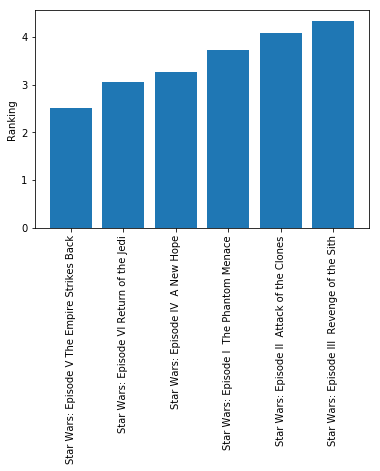

In [12]:
star_wars_mean = star_wars.mean()
star_wars_mean_sorted = star_wars_mean.sort_values()

# find "ranking" columns
# (source https://stackoverflow.com/a/21285575)
ranking_cols = [col for col in star_wars_mean.index if "ranking" in col]
ranking_cols_sorted = [col for col in star_wars_mean_sorted.index if "ranking" in col]

# draw bar plots
fig, ax = plt.subplots()

# set x axis
xtick_positions = np.arange(len(ranking_cols))
ax.bar(x=xtick_positions, height=star_wars_mean_sorted[ranking_cols_sorted])
ax.set_xticks(xtick_positions) # without this line, tick label positioning gets messed up
ax.set_xticklabels([rank_to_title[col] for col in ranking_cols_sorted])
# rotate xtick labels (source https://stackoverflow.com/a/23009503)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
    
# set y axis
ax.set_ylabel("Ranking")

"Star Wars: Episode V The Empire Strikes Back" came on top!

### Why?

Why did this movie come on top? Why were the rankings arranged this way?

#### Number of respondents who saw the movie
Could it be because it was seen the most? Let's see how the rankings are related with the number of respondents who saw the movie.

**Note**: This is only exploratory. There are too few data points for this analysis to mean anything.

r = -0.878


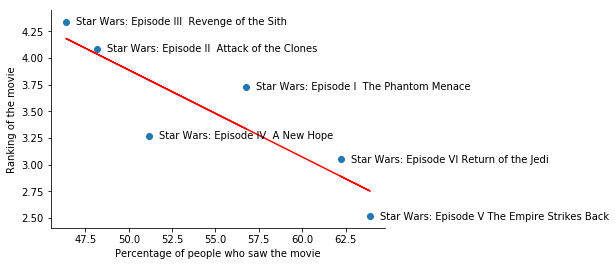

In [13]:
import numpy as np

star_wars_per = (star_wars.sum() / star_wars.shape[0]) * 100
seen_cols_new = star_wars.columns[3:9]

# draw scatter plot
fig, ax = plt.subplots()
xAxis = star_wars_per[seen_cols_new]
yAxis = star_wars_mean[ranking_cols]

# tag markers in scatter plot
for title, x, y in zip(titles, xAxis, yAxis):
    ax.annotate(
        title,
        xy=(x, y), xytext=(10, -5),
        textcoords='offset points', ha='left', va='bottom')

ax.scatter(x=xAxis,y=yAxis)

# rotate xtick labels (source https://stackoverflow.com/a/23009503)
#for tick in ax.get_xticklabels():
#    tick.set_rotation(90)
    
# set x axis label
ax.set_xlabel("Percentage of people who saw the movie")
    
# set y axis label
ax.set_ylabel("Ranking of the movie")

# remove upper and right spines
for key, val in ax.spines.items():
    if key in {"top", "right"}:
        val.set_visible(False)

# draw regression line
fit = np.polyfit(x=xAxis, y=yAxis, deg=1)
corr = round(np.corrcoef(xAxis, yAxis)[0][1], 3)
plt.plot(xAxis, fit[0] * xAxis + fit[1], color='red')
print("r = " + str(corr))

Maybe seeing the movie positively affectecd their rankings although there is one outlier.

Let's check this in each movie.

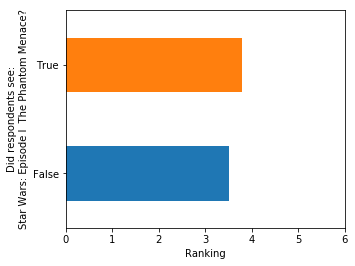

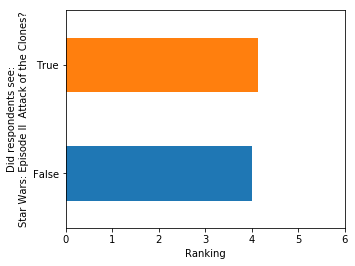

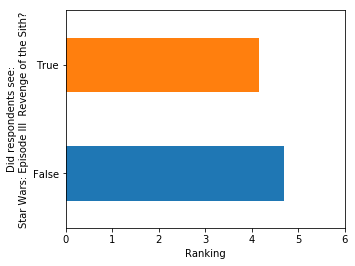

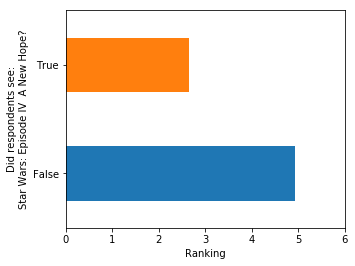

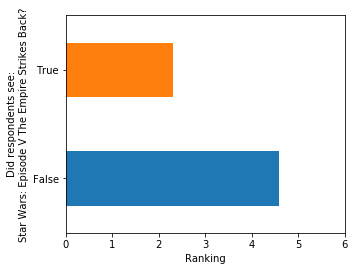

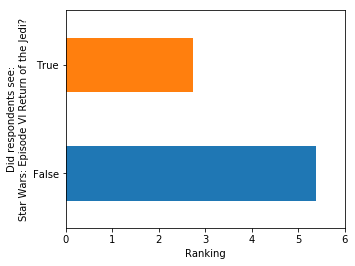

In [14]:
ranking_cols.sort()

for i, sc in enumerate(seen_cols_updated):
    star_wars_sc = star_wars.groupby(sc).agg(np.mean)
    star_wars_sc.reset_index(inplace=True)
    
    ax = star_wars_sc.plot.barh(x=sc, y=ranking_cols[i], figsize=(5, 4), legend=False)
    ax.set_xlabel("Ranking")
    ax.set_ylabel("Did respondents see:\n" + seen_to_title[sc] + "?")
    
    ax.set_xlim(0, 6)
    
    for tick in ax.get_xticklabels():
        tick.set_rotation(0)


Earlier-released ones were ranked similarly between seers and non-seers.

But, later ones tended to be ranked better by seers. Also, later ones had more seers than earlier ones.

It seems that, while growing numbers of people watched and increasingly liked the movies, reducing numbers of people did not watch it and liked them less and less.

## Finding the Most Viewed Movie

This is sort of a repeition of the scatter [plot made above](#Number-of-people-who-saw-the-movie), but more focused on the view counts.

Text(0,0.5,'Number of respondents who saw each movie')

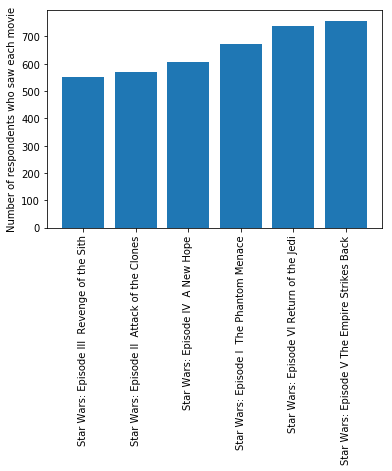

In [15]:
star_wars_sum = star_wars.sum()
star_wars_sum_sorted = star_wars_sum.sort_values()

seen_cols_sorted = [col for col in star_wars_sum_sorted.index if "seen_" in col]

# draw bar plots
fig, ax = plt.subplots()

# set x axis
xtick_positions = np.arange(len(seen_cols_sorted))
ax.bar(x=xtick_positions, height=star_wars_sum_sorted[seen_cols_sorted])
ax.set_xticks(xtick_positions)
ax.set_xticklabels([seen_to_title[col] for col in seen_cols_sorted])
# rotate xtick labels (source https://stackoverflow.com/a/23009503)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
    
# set y axis
ax.set_ylabel("Number of respondents who saw each movie")

Commenting will be skipped as this has been discussed above.

## Exploring the Data by Binary Segments

This section will ask the same questions covered above: movie rankings and number of respondents who saw the movies.

But, this time they will be divided into groups.

No statistical tests will be done as these are only exploratory analyses.

### Fan of Star Wars franchise or not?

#### Movie rankings

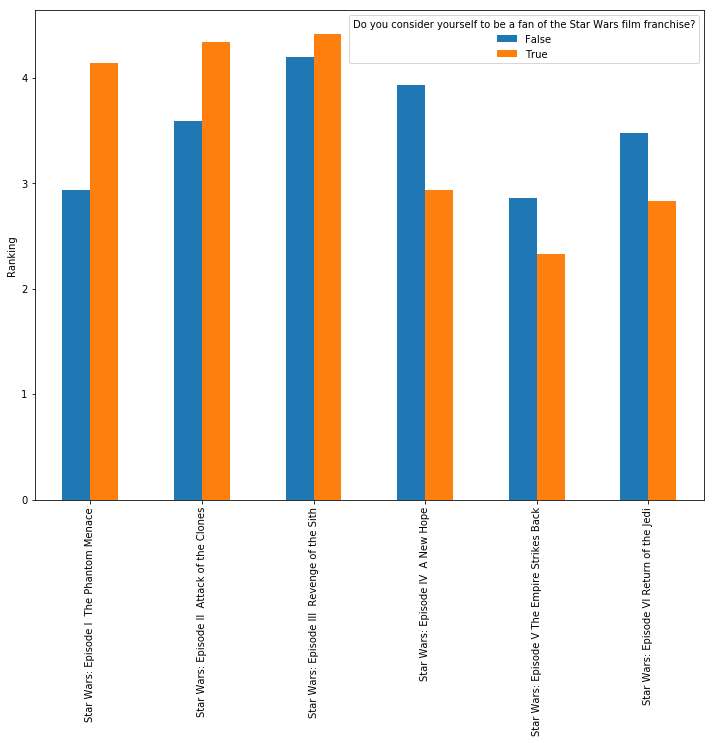

In [16]:
def pivotAndBar(df, index, pack, figsize):
    """
    df: data frame
    index: string. column to group df by
    pack: dict. this contains parameters and a function
        "values": list. columns to aggregate while grouping
        "xtickDic": dict. this will be used to convert column names
        "aggfunc": function. aggregate function to be run while grouping
        "ylabel": y axis labeldf_piv
    figsize: tuple. figure size of bar plot
    """

    df_piv = df.pivot_table(index=index, values=pack["values"], aggfunc=pack["aggfunc"])

    ax = df_piv.T.plot.bar(figsize=figsize)
    ax.set_xticklabels([pack["xtickDic"][i] for i in pack["values"]])
    ax.set_ylabel(pack["ylabel"])
    
    
q_fan = "Do you consider yourself to be a fan of the Star Wars \
film franchise?"

ylabel_ranking = "Ranking"
pack_ranking = {"values": ranking_cols,
                "xtickDic": rank_to_title,
                "aggfunc": np.mean,
                "ylabel": ylabel_ranking}
pivotAndBar(star_wars, q_fan, pack_ranking, (12, 9))

Compared to non-fans, the fans seem to have been less satisfied with the first three, but more with the last three releases.

#### Number of respondents who saw the movies

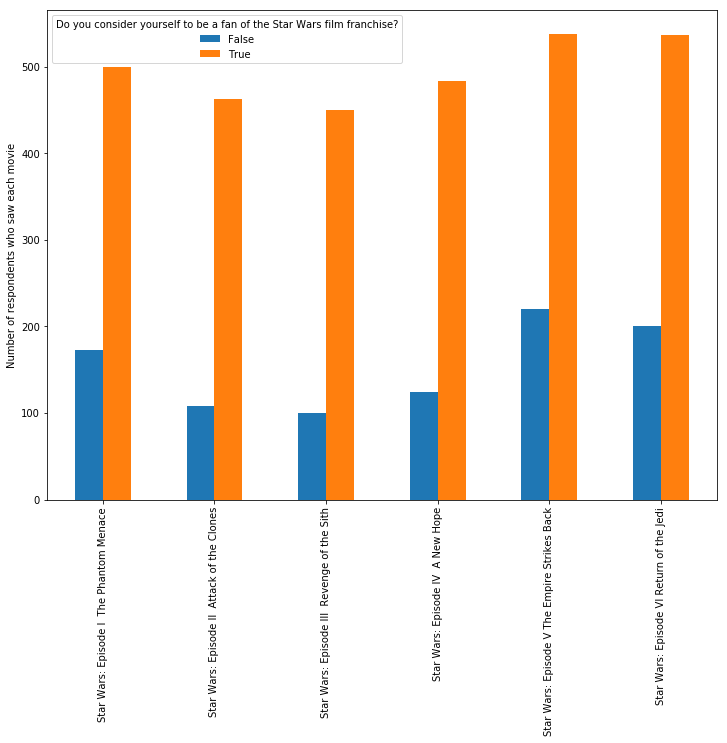

In [17]:
ylabel_seen = "Number of respondents who saw each movie"
pack_seen = {"values": seen_cols_updated,
                "xtickDic": seen_to_title,
                "aggfunc": np.sum,
                "ylabel": ylabel_seen}
pivotAndBar(star_wars, q_fan, pack_seen, (12, 9))

Fans saw them more than non-fans, which makes sense.

### Fan of the *Star Trek* franchise?

#### Movie rankings

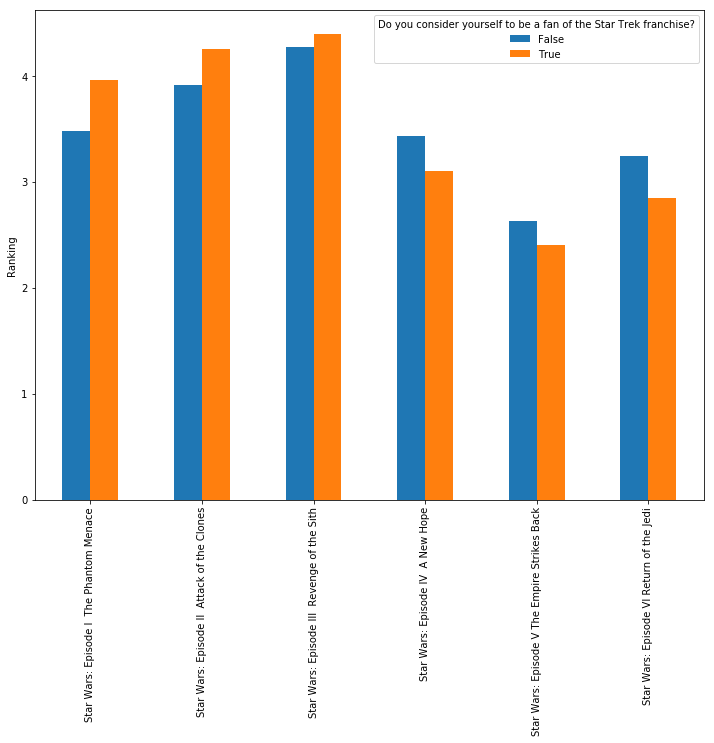

In [18]:
q_starTrek = "Do you consider yourself to be a fan of the Star Trek franchise?"
pivotAndBar(star_wars, q_starTrek, pack_ranking, (12, 9))

The difference looks smaller than [among fans and non-fans of Star Wars](#Movie-rankings) 

#### Number of respondents who saw the movies

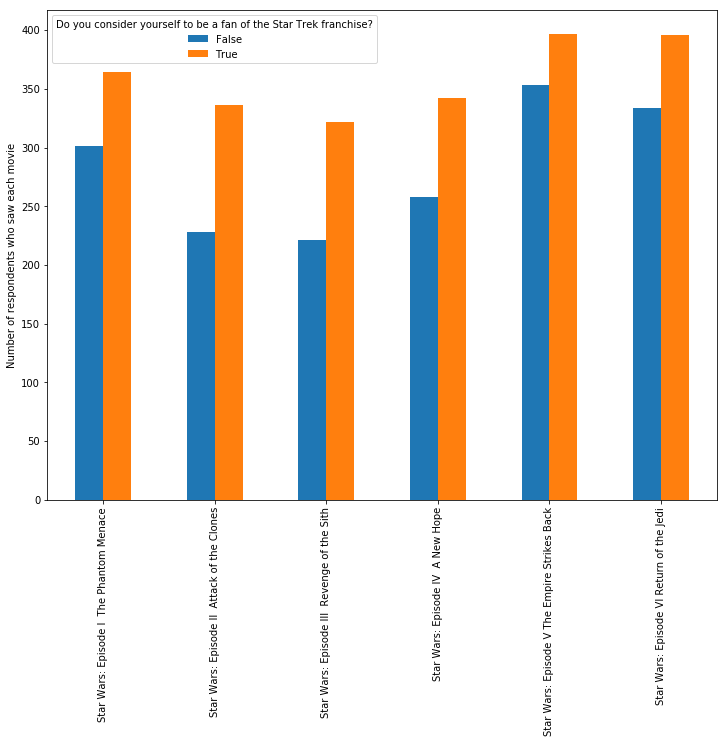

In [19]:
pivotAndBar(star_wars, q_starTrek, pack_seen, (12, 9))

Now, non-fans of Star Trek series watched watched Star Wars films a bit less than the fans. But, the difference is smaller than [between fans and non-fans of Star Wars](#Number-of-respondents-who-saw-the-movies).

### Male or female?

#### Movie rankings

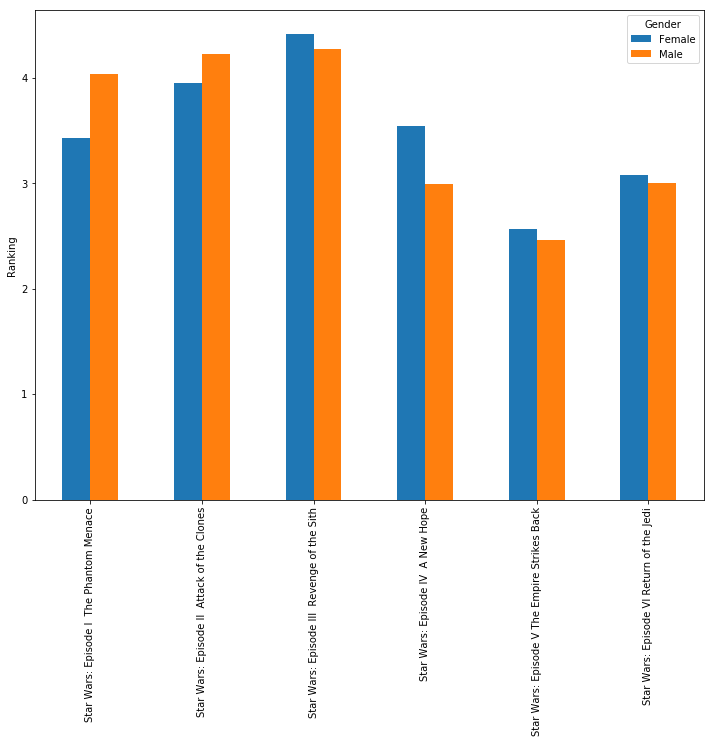

In [20]:
q_gender = "Gender"
pivotAndBar(star_wars, q_gender, pack_ranking, (12, 9))

There is not much difference between gender. The biggest difference was in the first release (preferred by female group) and the fourth release (preferred by male group).

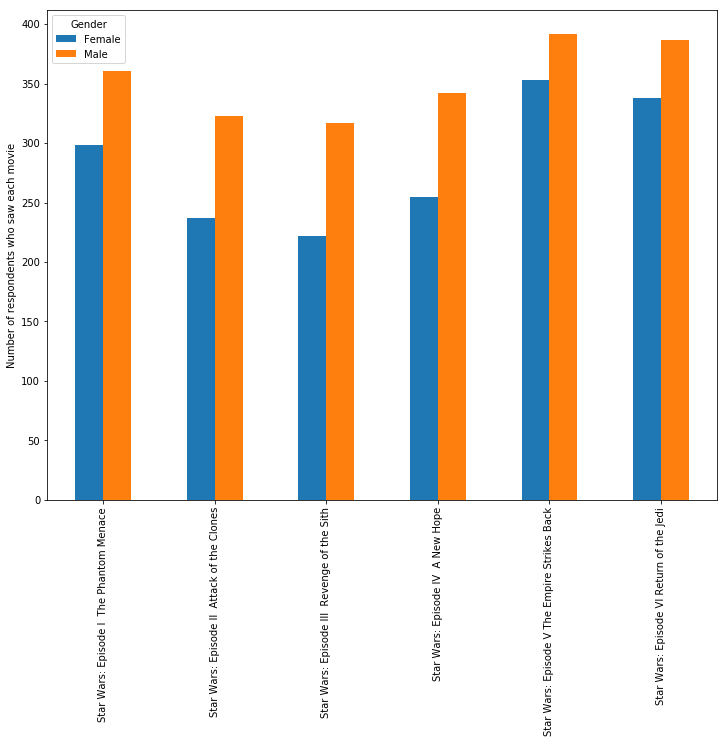

In [21]:
pivotAndBar(star_wars, q_gender, pack_seen, (12, 9))

Male group watched Star Wars movies more than the female counterpart. The gap looks smaller with the last two releases, though.

### Character favourableness

#### Most liked and disliked characters

Text(0,0.5,'Character rating')

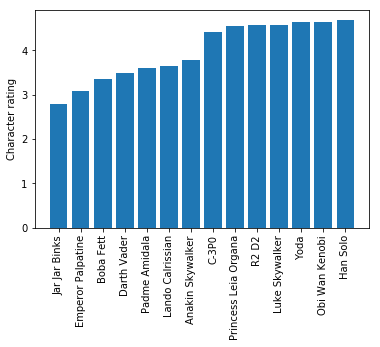

In [22]:
# find "char" columns
# (source https://stackoverflow.com/a/21285575)
character_cols = [col for col in star_wars_mean.index if col.startswith("char_")]
character_cols_sorted = [col for col in star_wars_mean_sorted.index if col.startswith("char_")]

# draw bar plots
fig, ax = plt.subplots()

# set x axis
xtick_positions = np.arange(len(character_cols))
ax.bar(x=xtick_positions, height=star_wars_mean_sorted[character_cols_sorted])
ax.set_xticks(xtick_positions)
ax.set_xticklabels([charCol_to_charName[col] for col in character_cols_sorted])
# rotate xtick labels (source https://stackoverflow.com/a/23009503)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
    
# set y axis
ax.set_ylabel("Character rating")

Han solo was liked the most while Jar Jar Binks was least liked.

#### Most controversial characters

Combination of the following cases will be defined as being most conversial possible.

- Proportions of positive and negative ratings are equal.
- Total mean distances from neutral ratings are biggest possible.
- Positive and negative ratings' mean distances from neutral rating are the same.

Each area will be scored and the scores will be multiplied, the product of which will be the level of controversialness.

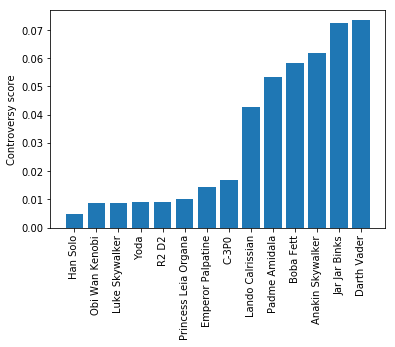

In [24]:
temp = {}

con_scores = []
for col in character_cols:
    char_col = star_wars[col]

    # 1. get proportions of +ve and -ve ratings
    pos_c = char_col[char_col > 3].sum()
    neg_c = char_col[char_col < 3].sum()

    bigger_c, smaller_c = (pos_c, neg_c) \
    if pos_c > neg_c \
    else (neg_c, pos_c)

    ratio_c = smaller_c / bigger_c

    # 2. get mean distance of ratings from neutral rating
    m_dFromN = abs(char_col.mean() - 3)

    # 3. get ratio of +ve and -ve ratings' mean distances from neutral rating
    pos_m_d = char_col[char_col > 3].mean() - 3
    neg_m_d = abs(char_col[char_col < 3].mean() - 3)

    bigger_m, smaller_m = (pos_m_d, neg_m_d) \
    if pos_m_d > neg_m_d \
    else (neg_m_d, pos_m_d)

    ratio_m = smaller_m / bigger_m

    # 4. get total controversy score
    con_score = ratio_c * m_dFromN * ratio_m

    con_scores.append(con_score)
    
    #temp["pos_c"] = round(pos_c, 3)
    #temp["neg_c"] = round(neg_c, 3)
    temp["ratio_c"] = "%.3f" % ratio_c
    temp["m_dFromN"] = round(m_dFromN, 3)
    #temp["pos_m_d"] = round(pos_m_d, 3)
    #temp["neg_m_d"] = round(neg_m_d, 3)
    temp["ratio_m"] = round(ratio_m, 3)
    temp["con_score"] = "%.3f" %con_score
    #print(temp)

# create bar plot
fig, ax = plt.subplots()
xtick_positions = np.arange(len(character_cols))
ax.bar(x=xtick_positions, height=con_scores_sorted)
ax.set_ylabel("Controversy score")
ax.set_xticks(xtick_positions)
ax.set_xticklabels(char_series_sorted.index)
    
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

# create bar plot with panda
#char_series = pd.Series(np.asarray(con_scores), index=character_cols)
#char_series.rename(index=charCol_to_charName, inplace=True)
#char_series_sorted = char_series.sort_values()
#con_scores_sorted = [score for score in char_series_sorted]

#ax = char_series_sorted.plot.bar()
#ax.set_ylabel("Controversy score")

Wow, most people seem to like Han Solo. On the other hand, some less popular characters like Jar Jar Binks and Darth Vader had mixed ratings.

# Closing comment

This is only an exploratory project. Any suggestions or views expressed here does not have sound statistical support.